# Quiz de simulación

Implemente un programa en donde ilustre para n iteraciones el tiempo promedio de permanencia de un paciente en una central de urgencias en una entidad prestadora de Salud según la cantidad de médicos que atienden, sabiendo que se dan tres tipos de prioridades. Indique los supuestos que consideró para la implementación y simule dos escenarios especificando los parámetros que modificó para cada uno.
Una cola de prioridades es una estructura de datos en la que los elementos se atienden en el orden indicado por una prioridad asociada a cada uno. Si varios elementos tienen la misma prioridad, se atenderán de modo convencional según la posición que ocupen.
Este tipo especial de colas tienen las mismas operaciones que las colas, pero con la condición de que los elementos se atienden en orden de prioridad.
Ejemplos de la vida diaria serían la sala de urgencias de un hospital, ya que los enfermos se van atendiendo en función de la gravedad de su enfermedad.
Entendiendo la prioridad como un valor numérico y asignando a altas prioridades valores pequeños, las colas de prioridad permiten añadir elementos en cualquier orden y recuperarlos de menor a mayor.

## Condiciones iniciales para el modelo.

* Se definen 3 colas con su respectiva frecuencia cada una.
* La frecuencia de las colas se calcula con un aleatorio de una distribución normal entre 5 y 12 minutos.
* Se estipula un tiempo de simulación de 2 horas (Se puede modificar).
* Se define un paciente con 2 atributos; Tiempo de atención "ta" y "a" para indicar el estado de su atención.
* El tiempo que va a durar cada paciente en atención, se calcula con un aleatorio de una distribución normal entre 10 y 15 minutos.
* Se definen 5 médicos para la atención (se puede variar).

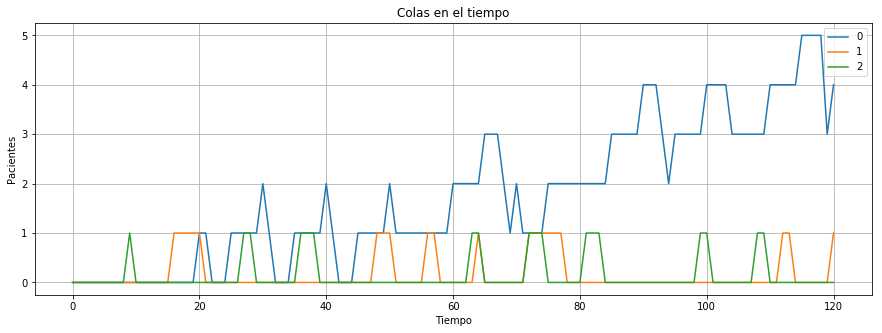

Total atendidos:  45
Media de tiempo en consulta 12.527272727272727
Frecuencias de llegada por prioridad
Prioridad 0 ->  5
Prioridad 1 ->  8
Prioridad 2 ->  9
Cantidad de consultorios atendiendo:  5


In [18]:
import numpy as np
import matplotlib.pyplot as plt

#definicion de pacientes
class Paciente:
    def __init__(self,ta):
        self.ta=ta
        self.a=False
    
    def iteration(self):
        self.ta=self.ta-1
    
    def atendido(self):
        if self.ta==0:
            self.a=True
        return self.a

#Funcion que devuelve consultorios libres
def getMedFree(consultorios):
    output=[]
    for i in range(len(consultorios)):
        if len(consultorios[i])==0:
            output.append(i)
    return output

#Funcion que devuelve consultorios ocupados
def getMedBusy(consultorios):
    output=[]
    for i in range(len(consultorios)):
        if len(consultorios[i])!=0:
            output.append(i)
    return output

#Función que devuelve la cola donde está el siguiente paciente de turno
def getNextPatient(colas):
    for i in range((len(colas)-1),-1,-1):
        if len(colas[i])!=0:
            return (i)
    return ('nadie')
#Definición de variables.

#Medicos que atienden.
numeroMedicos=5
#Consultorios
consultorios=[]

#Total atendidos
totalAtendidos=0

#Traceo de Tiempos de atencions
tiemposAtencion=[]

#Tiempo simulado 2 horas (en minutos)
maxTime=120

#Contador de tiempo t
t=0

#Definimos las 3 colas de pacientes.
colas=[[],[],[]]

#Definitmos dataSet para gráfica de colas
data=[[],[],[]]

#Frecuencias de llegada para las prioridades 1,2,3 siendo 1 la más importante y 3 la menos importante.

#Para la prioridad 1 se asigna un tiempo de llegada aleatorio entre 5 y 12 minutos.
priority1=np.random.randint(low=5,high=13)

#Para la prioridad 2 se asigna un tiempo de llegada aleatorio entre 5 y 12 minutos.
priority2=np.random.randint(low=5,high=13)

#Verificamos si la prioridad es distinta de la anterior.
while priority2 == priority1:
    priority2=np.random.randint(low=5,high=13)

#Para la prioridad 3 se asigna un tiempo de llegada aleatorio entre 5 y 12 minutos.
priority3=np.random.randint(low=5,high=13)

#Verificamos que la prioridad sea distinta a las anteriores.
while priority3 == priority2 or priority3==priority1:
    priority3=np.random.randint(low=5,high=13)
    
#Creamos los consultorios
for i in range(numeroMedicos):
    consultorios.append([])

#Revisamos si el tiempo es menor al periodo estipulado e iteramos el sistema mientras esto se cumpla.
while t<=maxTime:
    #Verificamos si el tiempo es múltiplo de las prioridades para anexar pacientes a la cola
    if t % priority1==0:
        colas[0].append(Paciente(np.random.randint(low=10, high=16)))
        #Registramos el tiempo en el histórico
        tiemposAtencion.append(colas[0][-1].ta)
    if t % priority2==0:
        colas[1].append(Paciente(np.random.randint(low=10, high=16)))
        tiemposAtencion.append(colas[1][-1].ta)
    if t % priority3==0:
        colas[2].append(Paciente(np.random.randint(low=10, high=16)))
        tiemposAtencion.append(colas[2][-1].ta)
    #Buscamos un consultorio libre y le asignamos el siguiente paciente en la lista
    consulLibres=getMedFree(consultorios)
    for i in consulLibres:
        nextPatient=getNextPatient(colas)
        #Verificamos que halla paciente en cola
        if nextPatient != 'nadie':
            #Escogemos el consultorio y le ponemos el paciente
            consultorios[i].append(colas[nextPatient][0])
            #Sacamos el paciente de cola
            colas[nextPatient].pop(0)
        else:
            break
    #Aquí iteramos los tiempos de atención de los pacientes
    consulLlenos=getMedBusy(consultorios)
    for j in consulLlenos:
        consultorios[j][0].iteration()
        consultorios[j][0].atendido()
        if consultorios[j][0].a==True:
            consultorios[j].pop(0)
            totalAtendidos=totalAtendidos+1
    #Registramos los tamaños de las colas para gráfica de datos
    for y in range(len(data)):
        data[y].append(len(colas[y]))
    t=t+1

#Imprimimos el traceo de datos de las colas
plt.figure(figsize=(15,5))
for u in range(len(data)):
    plt.plot(data[u], label=u)
#plt.axis([0,ti,0,maxdura])
plt.legend()
plt.title('Colas en el tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Pacientes')
plt.grid()
plt.show()
        
        
print ('Total atendidos: ',totalAtendidos)
print ('Media de tiempo en consulta', np.mean(tiemposAtencion))
print ('Frecuencias de llegada por prioridad')
print ('Prioridad 0 -> ',priority1)
print ('Prioridad 1 -> ',priority2)
print ('Prioridad 2 -> ',priority3)
print ('Cantidad de consultorios atendiendo: ',numeroMedicos)